In [7]:
# hyperopt, xgboost 사용해서 유방암 예측 모델
# 임포트
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [8]:
# 데이터 로딩 : 딕셔너리
dataset = load_breast_cancer()

cancer_df=pd.DataFrame(
    data=dataset.data, # 데이터
    columns=dataset.feature_names, # 컬럼명 추출해서 대입
)
cancer_df['target']=dataset.target
# 데이터프레임에서 데이터와 레이블 분리 저장
X_features=cancer_df.iloc[:,:-1] # 데이터 추출 
y_label=cancer_df.iloc[:,-1] # 레이블 추출

# 학습/테스트 분리
X_train, X_test, y_train, y_test = \
    train_test_split(
        X_features, y_label, test_size=0.2, random_state=156
    )
# 학습데이터 => 학습/검증 분리
X_tr, X_val, y_tr, y_val = \
    train_test_split(
        X_train, y_train, test_size=0.1, random_state=156
    )


In [16]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# 데이터 로드
data = load_breast_cancer()

# 특성과 타깃을 데이터프레임으로 변환
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 데이터 확인
print(df.head())
print(df.info())
print(df.describe())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
# search space 설정
# 하이퍼 파라미터 
# max_depth(정수) : 5 ~ 20까지 1간격
# min_child_weight(정수) : 1, 2
# colsample_bytree(실수) : 0.5 ~ 1
# learning_rate(실수) : 0.01 ~ 0.2 사이
from hyperopt import hp

xgb_search_space={
    'max_depth': hp.quniform('max_depth', 5,20,1),
    'min_child_weight':hp.quniform('min_child_weight',1,2,1),
    'learning_rate':hp.uniform('learning_rate', 0.01,0.2),
    'colsample_bytree':hp.uniform('colsample_bytree', 0.5,1)
}


In [ ]:
# hyperopt 라이브러리에서 fmin()함수가 호출할 떄 쓰이는 함수수
# objective function 선언
from sklearn.model_selection import cross_val_score # 교차검증점수(평가점수)
from xgboost import XGBClassifier 
from hyperopt import STATUS_OK # STATUS_OK='ok' 상수(변수)

def objective_func(search_space): # 함수(검색공간) 선언 :
    # objective_func(xgb_search_space) 사용예정
    # 모델 생성
    xgb_clf=XGBClassifier(
        n_estimators=100, # 트리 100개 사용 : 속도 빠르게 하려고 작게 설정
        max_depth=int(search_space['max_depth']),
        min_child_weight=int(search_space['min_child_weight']),
        learning_rate=search_space['learning_rate'],
        colsample_bytree=search_space['colsample_bytree'],
        eval_metric='logloss' # 손실(오차측정)구하는 함수다
    )
    
    # 위 모델을 가지고 점수(정확도)를 구해야 한다 => 반환해야 
    # 교차 검증 수행
    accuracy=cross_val_score( #정확도 3개 반환 
        xgb_clf, # 점수를 구할 모델 설정
        X_train, # 학습데이터 전체 넣어야 한다
        y_train, 
        scoring='accuracy', # 평가 점수 : 정확도로 평가하겠다
        cv=3 # 정확도가 3개 나온다
    )
    
    return {'loss': -1*np.mean(accuracy), 'status':STATUS_OK}
# 정확도를 음수로 변환해서 반환하는 이유 : fmin()함수는 작을수록 좋은 값을 찾는 구조라
# STATUS_OK : 하이퍼 파라미터 실험이 정상적으로 끝났다는 의미

    

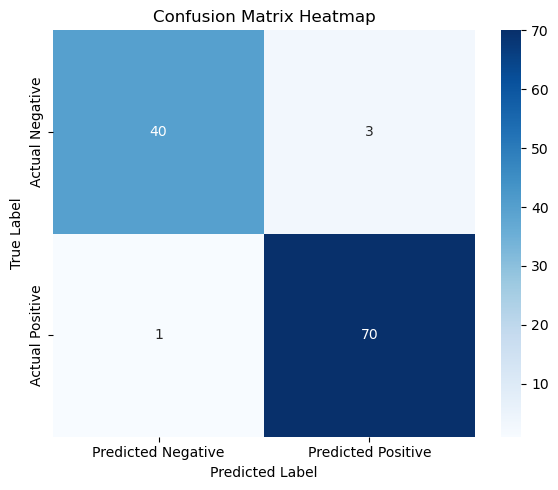

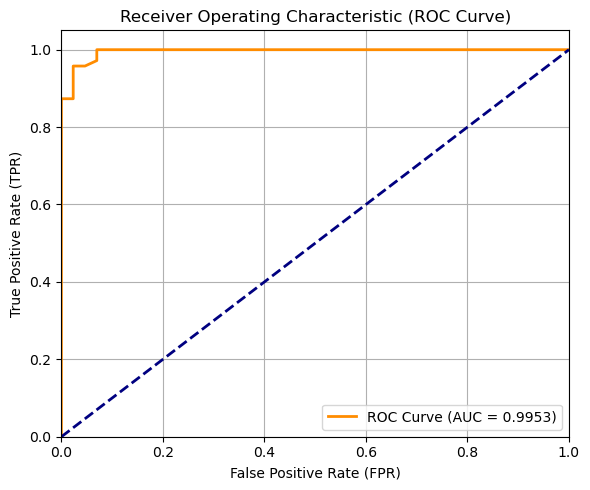

In [27]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 시각화 함수 정의
def plot_confusion_matrix_heatmap(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.title("Confusion Matrix Heatmap")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_test, pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 기준선
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC Curve)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 1. 유방암 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target

# 2. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 모델 학습 (랜덤 포레스트)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. 예측 및 예측 확률
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 5. 시각화
plot_confusion_matrix_heatmap(y_test, y_pred)
plot_roc_curve(y_test, y_pred_proba)


In [ ]:
# BEST hpyer parameter 
from hyperopt import fmin, tpe, Trials

# 상태 정보를 저장하기 위해 생성
trail_val=Trials()

best=fmin(
    fn=objective_func, # 목적 함수 (입력된 파라미터 -> 성능 반환)
    space=xgb_search_space, # 탐색 범위 (하이퍼 파라미터 search space)
    algo=tpe.suggest, # 탐색 알고리즘 (Tree-structured Parzen Estimator)
    max_evals=50, # 최대 시도 횟수 (50 번 실험)
    trials=trail_val, # 시도한 결과 저장
    rstate=np.random.default_rng(seed=9) # 랜덤 시드 설정 (재현성 확보)
)
print(f'BEST : {best}') #최종적으로 가장 성능이 좋은 하이퍼 파라미터 조합 출력

100%|██████████| 50/50 [00:21<00:00,  2.37trial/s, best loss: -0.967047170907401] 
BEST : {'colsample_bytree': np.float64(0.7923560109541058), 'learning_rate': np.float64(0.1938940946651398), 'max_depth': np.float64(16.0), 'min_child_weight': np.float64(2.0)}


In [ ]:
# 모델 생성 성능 평가 : get_clf_eval(원래답, 예측값, 예측확률)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 평가 지표 불균형 데이터 셋 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred) # 정확도 점수
    precision = precision_score(y_test , pred) # 정밀도 점수
    recall = recall_score(y_test , pred) # 재현율 점수
    f1 = f1_score(y_test,pred) # 정밀도, 재현율 조화평균 값
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba) # AUC 점수 : 불균형 데이터 셋에서 필요
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
xgb_wrapper = XGBClassifier(n_estimators=1000,
                            learning_rate=round(best['learning_rate'], 5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5)
                            , early_stopping_rounds=50
                            , eval_metric='logloss'
)

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr,
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test) # 예측값
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1] # 예측 확률

get_clf_eval(y_test, preds, pred_proba)


[0]	validation_0-logloss:0.52017	validation_1-logloss:0.56664
[1]	validation_0-logloss:0.41762	validation_1-logloss:0.49501
[2]	validation_0-logloss:0.34123	validation_1-logloss:0.43295
[3]	validation_0-logloss:0.28440	validation_1-logloss:0.39091
[4]	validation_0-logloss:0.24056	validation_1-logloss:0.35565
[5]	validation_0-logloss:0.20676	validation_1-logloss:0.33910
[6]	validation_0-logloss:0.17704	validation_1-logloss:0.31555
[7]	validation_0-logloss:0.15563	validation_1-logloss:0.29982
[8]	validation_0-logloss:0.13628	validation_1-logloss:0.28915
[9]	validation_0-logloss:0.11984	validation_1-logloss:0.27626
[10]	validation_0-logloss:0.10728	validation_1-logloss:0.27569
[11]	validation_0-logloss:0.09639	validation_1-logloss:0.27079
[12]	validation_0-logloss:0.08691	validation_1-logloss:0.26944
[13]	validation_0-logloss:0.07998	validation_1-logloss:0.26511
[14]	validation_0-logloss:0.07359	validation_1-logloss:0.26765
[15]	validation_0-logloss:0.06817	validation_1-logloss:0.26790
[1

---
### 위스콘신 유방암 예측 모델 성능 평가 보고서
---

### 주요 평가 지표

| 평가 지표             | 값     | 설명                                   |
|------------------------|--------|----------------------------------------|
| 정확도 (Accuracy)      | 0.9386 | 전체 예측 중 실제 정답의 비율           |
| 정밀도 (Precision)     | 0.9605 | 양성으로 예측한 것 중 실제 양성의 비율 |
| 재현율 (Recall)        | 0.9481 | 실제 양성 중 올바르게 예측한 비율      |
| F1 Score               | 0.9542 | 정밀도와 재현율의 조화 평균            |
| ROC-AUC Score          | 0.9940 | 모델의 전반적인 분류 성능 지표         |

---

### 오차 행렬 (Confusion Matrix)

| 실제 \\ 예측       | 양성 (Positive) | 음성 (Negative) |
|-------------------|------------------|------------------|
| 양성 (Positive)   | TP = 73           | FN = 4           |
| 음성 (Negative)   | FP = 3            | TN = 34          |

---

※ 위의 모델은 LightGBM을 기반으로 GridSearchCV를 통한 하이퍼파라미터 튜닝 이후 최적 성능 달성.


In [ ]:
# 라이브러리 임포트 : LightGBM, numpy, 사이킷런의 데이터셋, 모델 평가 도구들을 불러옴.
import lightgbm as lgb
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. 유방암 데이터 로딩
data = load_breast_cancer() #유방암 진단 데이터셋 불러오기
X = data.data #입력 특성: 30개 feature
y = data.target #타겟 (0: 악성, 1: 양성)

# 2. 학습/검증/테스트 데이터 분할 : 전체 데이터를 80% 학습용 / 20% 테스트용으로 나눔
# 다시 학습용의 80%를 진짜 학습용, 나머지 20%는 검증용으로 분리
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_tr, X_val, y_tr, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)

# 3. 모델 평가 함수 정의
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('\n 오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

# 4. LightGBM Dataset 구성 :LightGBM이 요구하는 Dataset 형식으로 학습/검증 데이터 구성
dtrain = lgb.Dataset(X_tr, label=y_tr)
dvalid = lgb.Dataset(X_val, label=y_val)

# 5. 하이퍼파라미터 설정
params = {
    'objective': 'binary', # 목적 함수: 이진 분류 (binary)
    'metric': 'binary_logloss',#평가 지표: 로그 손실 (binary_logloss)
    'learning_rate': 0.05,#학습률
    'num_leaves': 31,
    'random_state': 42,
    'verbose': -1 #로그 최소화
}

# 6. logloss 저장 및 출력 콜백 함수 : 학습 과정을 시각화하거나 분석할 때 사용
logloss_train = []
logloss_val = []

def log_callback(env): #각 반복(iteration)마다 train/validation의 logloss를 출력하고 저장
    train_loss = env.evaluation_result_list[0][2]
    val_loss = env.evaluation_result_list[1][2]
    logloss_train.append(train_loss)
    logloss_val.append(val_loss)
    print(f'[{env.iteration}] validation_0-logloss:{train_loss:.5f}\tvalidation_1-logloss:{val_loss:.5f}')

# 7. 모델 학습 : LightGBM
lgb_model = lgb.train( #학습된 모델은 lgb_model에 저장됨.
    params,
    dtrain,
    num_boost_round=100,#최대 100회 반복학습습
    valid_sets=[dtrain, dvalid],
    valid_names=['validation_0', 'validation_1'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=20),#검증 성능이 20회 이상 개선되지 않으면 조기 종료.
        log_callback #log_callback으로 매 반복마다 logloss 출력.
    ]
)

# 8. 예측 및 성능평가
preds = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)#테스트셋으로 예측 수행
pred_labels = np.where(preds > 0.5, 1, 0)
# 확률값(preds)을 기준으로 0.5 초과면 1, 이하면 0으로 변환하여 클래스 레이블(pred_labels) 생성

# 앞서 정의한 평가 함수로 성능 출력.
get_clf_eval(y_test, pred_labels, preds)


[0] validation_0-logloss:0.62112	validation_1-logloss:0.62307
Training until validation scores don't improve for 20 rounds
[1] validation_0-logloss:0.58529	validation_1-logloss:0.58840
[2] validation_0-logloss:0.55325	validation_1-logloss:0.55829
[3] validation_0-logloss:0.52397	validation_1-logloss:0.52960
[4] validation_0-logloss:0.49749	validation_1-logloss:0.50432
[5] validation_0-logloss:0.47306	validation_1-logloss:0.48032
[6] validation_0-logloss:0.44986	validation_1-logloss:0.45750
[7] validation_0-logloss:0.42891	validation_1-logloss:0.43786
[8] validation_0-logloss:0.40909	validation_1-logloss:0.41868
[9] validation_0-logloss:0.38946	validation_1-logloss:0.40130
[10] validation_0-logloss:0.37206	validation_1-logloss:0.38466
[11] validation_0-logloss:0.35501	validation_1-logloss:0.37007
[12] validation_0-logloss:0.33918	validation_1-logloss:0.35545
[13] validation_0-logloss:0.32501	validation_1-logloss:0.34205
[14] validation_0-logloss:0.31080	validation_1-logloss:0.32997
[15]

In [23]:
# 📦 필요한 라이브러리
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ✅ LightGBM 모델 학습
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# ✅ 예측 수행
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # ROC-AUC를 위한 확률값

# ✅ 오차 행렬 계산
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# ✅ 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# ✅ 출력
print(' 모델 성능 평가')
print(f'오차행렬 (TN, FP, FN, TP): {TN}, {FP}, {FN}, {TP}')
print(f'정확도 (Accuracy): {accuracy:.4f}')
print(f'정밀도 (Precision): {precision:.4f}')
print(f'재현율 (Recall): {recall:.4f}')
print(f'F1 점수 (F1 Score): {f1:.4f}')
print(f'ROC-AUC: {auc:.4f}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 285, number of negative: 170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4544
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626374 -> initscore=0.516691
[LightGBM] [Info] Start training from score 0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 285, number of negative: 170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4544
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626374 -> initscore=0.516691
[LightGBM] [Info] Start training from score 0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

C:\Users\jh\AppData\Local\Temp\ipykernel_12412\1037181071.py:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


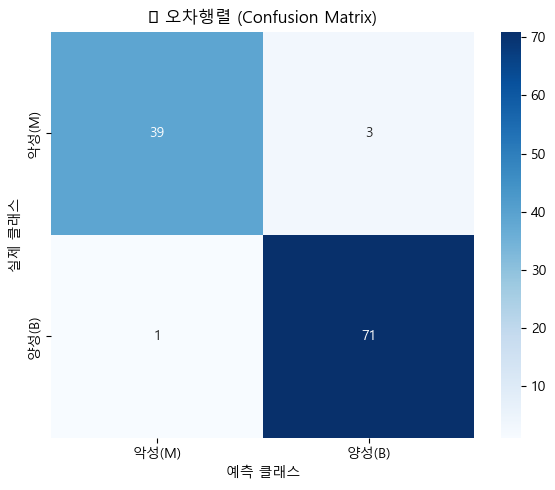

In [24]:
# 라이브러리 임포트
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 학습
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 오차행렬 계산
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# 수치 출력
print('오차행렬 (Confusion Matrix)')
print(f'TN (True Negative): {TN}')
print(f'FP (False Positive): {FP}')
print(f'FN (False Negative): {FN}')
print(f'TP (True Positive): {TP}')

# ✅ 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['악성(M)', '양성(B)'],
            yticklabels=['악성(M)', '양성(B)'])
plt.xlabel('예측 클래스')
plt.ylabel('실제 클래스')
plt.title('오차행렬 (Confusion Matrix)')
plt.tight_layout()
plt.show()


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

def plot_confusion_matrix_heatmap(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.title("Confusion Matrix Heatmap")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

def plot_roc_curve(y_test, pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 랜덤 기준선
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC Curve)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 혼동 행렬 히트맵 저장 함수
def plot_confusion_matrix_heatmap(y_test, y_pred, filename='confusion_matrix.png'):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.title("Confusion Matrix Heatmap")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.savefig(filename)  # 이미지 파일로 저장
    plt.show()

# ROC 곡선 저장 함수
def plot_roc_curve(y_test, pred_proba, filename='roc_curve.png'):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC Curve)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(filename)  # 이미지 파일로 저장
    plt.show()


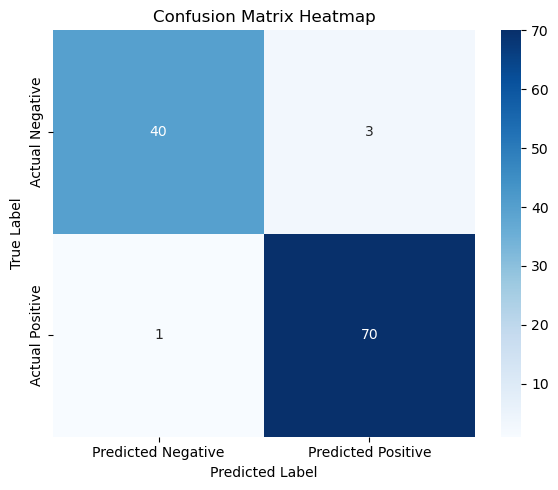

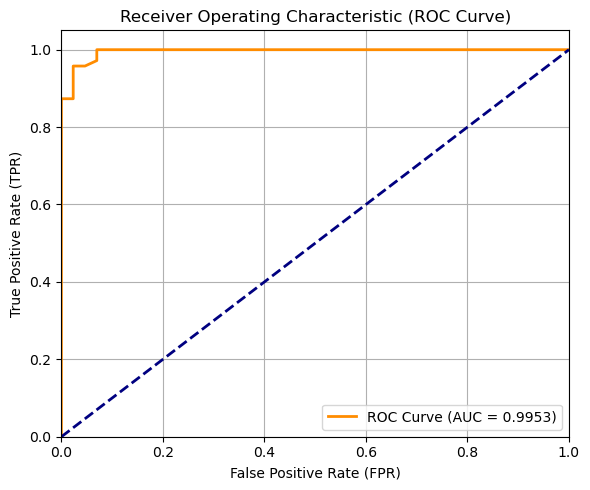

In [23]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 시각화 함수 정의
def plot_confusion_matrix_heatmap(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.title("Confusion Matrix Heatmap")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_test, pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 기준선
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC Curve)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 1. 유방암 데이터 자동로드
data = load_breast_cancer()
X = data.data
y = data.target

# 2. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 모델 학습 (랜덤 포레스트)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. 예측 및 예측 확률
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 5. 시각화
plot_confusion_matrix_heatmap(y_test, y_pred)
plot_roc_curve(y_test, y_pred_proba)


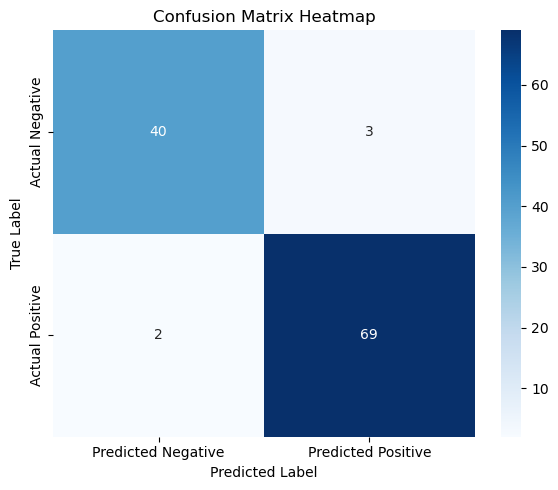

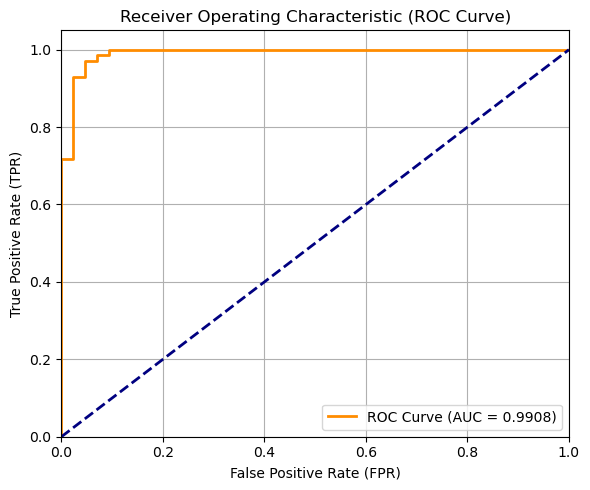

In [24]:
# 필요한 라이브러리 불러오기
import numpy as np # 데이터 처리
import pandas as pd #데이터 처리
import matplotlib.pyplot as plt # 시각화
import seaborn as sns #시각화

from sklearn.datasets import load_breast_cancer #유방암 데이터 로딩
from sklearn.model_selection import train_test_split # 학습/테스트 데이터 분할
from sklearn.metrics import roc_curve, auc, confusion_matrix #roc curve 와 auc 점수계산
from xgboost import XGBClassifier  # XGBoost 사용

# 시각화 함수 정의
def plot_confusion_matrix_heatmap(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred) #예측값과 실제값을 비교해 혼동행렬 계산
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.title("Confusion Matrix Heatmap")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_test, pred_proba): #다양한 임계값에 따른 fpr/tpr 계산
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
    roc_auc = auc(fpr, tpr) #면적 계산 -> 1에 가까울수록 좋음

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC Curve)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 1. 유방암 데이터 로드
data = load_breast_cancer() #유방암 데이터셋:sklearn에 내장된 클래스 불균형 이진분류데이터
X = data.data # X: 종양에 대한 특성들 (mean radius, texture 등 30개)
y = data.target # y: 라벨 (0 = 악성, 1 = 양성)



# 2. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 전체 데이터 중 20%를 테스트 데이터로 분리

# 3. 모델 학습 (XGBoost)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train) # 학습 진행

# 4. 예측 및 예측 확률
y_pred = model.predict(X_test) #predict(): 분류 결과 반환 (0 또는 1)
y_pred_proba = model.predict_proba(X_test)[:, 1] # 클래스 1 (양성)일 확률만 추출 → ROC용

# 5. 시각화
plot_confusion_matrix_heatmap(y_test, y_pred) #히트맵으로 시각화
plot_roc_curve(y_test, y_pred_proba) #roc커브로 시각화


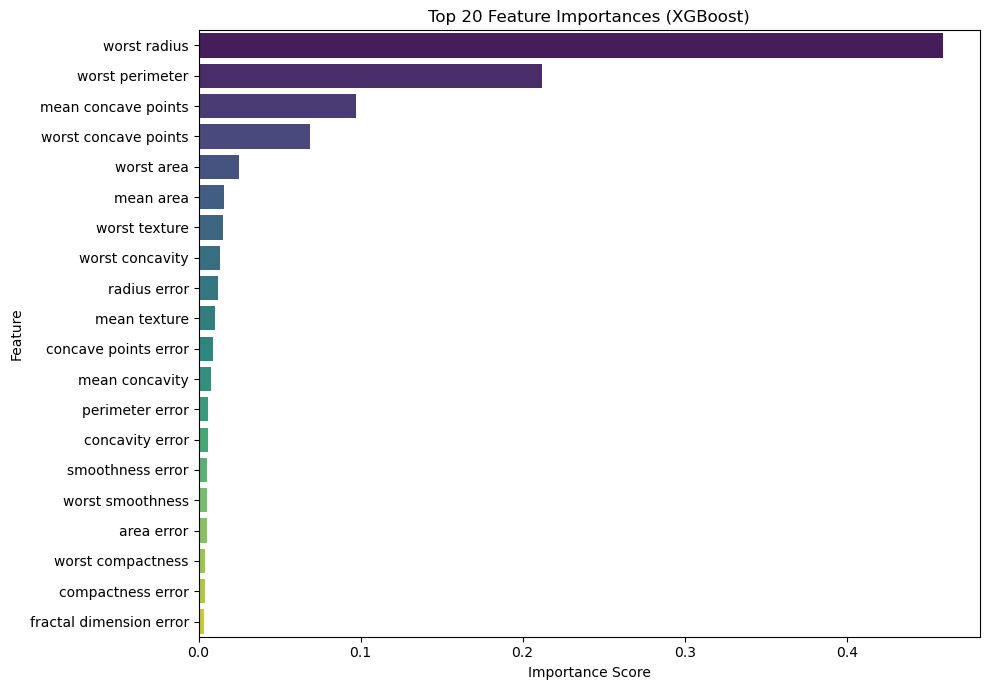

In [26]:
import matplotlib.pyplot as plt #시각화 도구
import seaborn as sns #시각화 도구
import pandas as pd #데이터 프레임 처리
from sklearn.datasets import load_breast_cancer #유방암 데이터셋 로드
from xgboost import XGBClassifier #분류 문제 XGBoost 모델

# 1. 데이터 불러오기
data = load_breast_cancer() #유방암 진단 데이터셋 로드드
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 2. 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X, y) #X,y 전체 데이터를 사용해 학습

# 3. 피처 중요도 추출 및 시각화
ftr_importances = pd.Series(model.feature_importances_, index=X.columns)#피처 이름과 중요도 점수 매핑
#XGBoost에서 자동으로 계산된 피처별 상대적 중요도 

ftr_top20 = ftr_importances.sort_values(ascending=False).head(20)#높은 순으로 정렬해 상위 피처만 표시

# 4. 시각화
plt.figure(figsize=(10, 7))
sns.barplot(x=ftr_top20, y=ftr_top20.index, palette="viridis") #피처중요도 수평막대그래프로 시각화
plt.title('Top 20 Feature Importances (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout() #그래프 여백 자동 조정
plt.show()


---
### 피처 상위20개 시각화 그래프 사용하는 목적
---
* 모델의 해석력 강화: 블랙박스처럼 보이는 모델도 왜 그 결과를 냈는지 이해 가능

* 피처 선택 최적화: 덜 중요한 피처를 제거해 성능 향상 시도 가능

* 의료적 인사이트 제공: 진단에서 중요한 피처가 무엇인지 알려줄 수 있음

In [ ]:
# 필요한 라이브러리
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 1. 데이터 로드
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 2. 결측치 처리 (혹시 모를 결측값에 대비)
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 3. 이상치 제거 (IQR 방식)
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    condition = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[condition]

X_no_outliers = remove_outliers_iqr(X_imputed)
y_no_outliers = y[X_no_outliers.index]  # X에 맞게 y도 같이 필터링

# 4. 특성 스케일링
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_no_outliers), columns=X.columns)

# 5. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_no_outliers, test_size=0.2, random_state=42, stratify=y_no_outliers
)

# 결과 확인
print(f'이상치 제거 후 데이터 shape : ', X_scaled.shape)
print(f'훈련 데이터 shape : ', X_train.shape)
print(f'테스트 데이터 shape : ', X_test.shape)


이상치 제거 후 데이터 shape: (398, 30)
훈련 데이터 shape: (318, 30)
테스트 데이터 shape: (80, 30)


In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 1. 데이터 로드
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 2. 결측값 확인
print(f'결측값 개수 :\n ', X.isnull().sum())

# 3. 결측값 처리 (예: 평균값으로 대체, 이 데이터셋은 결측값 거의 없음)
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 4. 특성 스케일링 (표준화)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# 5. 학습용/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 전처리 완료 결과 확인
print(f'훈련 데이터 shape : ', X_train.shape)
print(f'테스트 데이터 shape : ', X_test.shape)


결측값 개수:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64
훈련 데이터 shape: (455, 30)
테스트 데이터 shape: (114, 30)


[LightGBM] [Info] Number of positive: 285, number of negative: 170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4544
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626374 -> initscore=0.516691
[LightGBM] [Info] Start training from score 0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


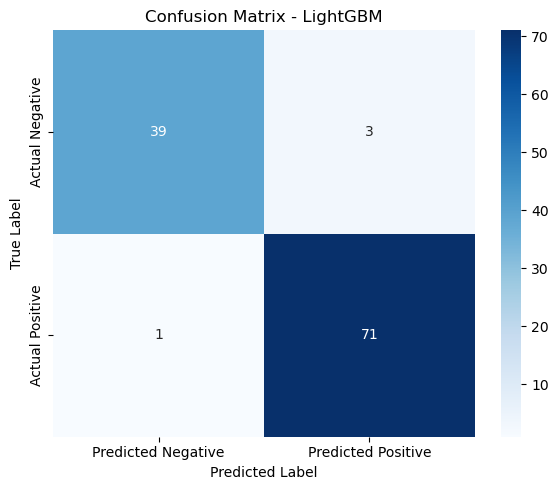

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

# 1️. 데이터 로딩
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 2️. 데이터 전처리 (스케일링)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 4️. LightGBM 모델로 학습
lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_clf.fit(X_train, y_train)

# 5️. 예측
y_pred = lgb_clf.predict(X_test)
y_pred_proba = lgb_clf.predict_proba(X_test)[:, 1]

# 6️. 성능 평가
print(f'정확도 (Accuracy) : ', accuracy_score(y_test, y_pred))
print(f'\n 분류 리포트 : \n', classification_report(y_test, y_pred))
print(f'ROC-AUC 점수 : ', roc_auc_score(y_test, y_pred_proba))

# 7️. 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Confusion Matrix - LightGBM")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


In [4]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1️. 데이터 로드
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 2. 결측값 확인
print(f' 결측값 개수 : \n', X.isnull().sum())

# 3️. 결측값 처리 (평균값으로 대체)
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 4. 특성 스케일링 (표준화)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# 5️. 학습용/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 전처리 완료 결과 확인
print(f' 훈련 데이터 shape : ', X_train.shape)
print(f' 테스트 데이터 shape : ', X_test.shape)


 결측값 개수 : 
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64
 훈련 데이터 shape :  (455, 30)
 테스트 데이터 shape :  (114, 30)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 285, number of negative: 170
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4544
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626374 -> initscore=0.516691
[LightGBM] [Info] Start training from score 0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

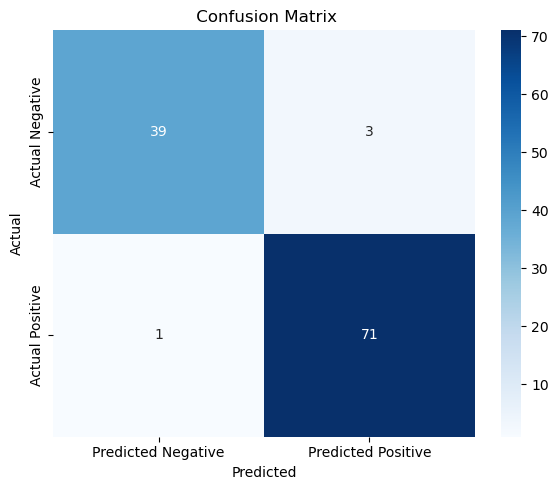

In [5]:
# 필요한 라이브러리 불러오기
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1️. LightGBM 모델 생성 및 학습
lgb_clf = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42
)
lgb_clf.fit(X_train, y_train)

# 2️. 예측 수행
y_pred = lgb_clf.predict(X_test)
y_pred_proba = lgb_clf.predict_proba(X_test)[:, 1]

# 3️. 평가 지표 출력
print(f' Accuracy : ', accuracy_score(y_test, y_pred))
print(f' ROC-AUC : ', roc_auc_score(y_test, y_pred_proba))
print(f'\n Classification Report : \n', classification_report(y_test, y_pred))

# 4️. Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title(" Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### 주요 평가 지표 설명 (Classification Metrics)

| 지표 | 의미 |
|------|------|
| **Accuracy** | 전체 예측 중 실제 정답 비율 <br>정확하게 맞춘 예측 / 전체 샘플 수 |
| **ROC-AUC** | 이진 분류 성능 지표. <br>1에 가까울수록 모델 성능이 우수함 |
| **classification_report** | 정밀도(Precision), 재현율(Recall), F1-score 등을 종합적으로 제공 |
| **confusion_matrix** | 예측 vs 실제 클래스 비교 행렬. <br>TP, TN, FP, FN 개수로 성능 분석 가능 |


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 285, number of negative: 170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4544
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626374 -> initscore=0.516691
[LightGBM] [Info] Start training from score 0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

C:\Users\jh\AppData\Local\Temp\ipykernel_12412\4090894870.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df.head(15), palette='viridis')
C:\Users\jh\AppData\Local\Temp\ipykernel_12412\4090894870.py:33: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jh\AppData\Local\Temp\ipykernel_12412\4090894870.py:33: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jh\AppData\Local\Temp\ipykernel_12412\4090894870.py:33: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jh\AppData\Local\Temp\ipykernel_12412\4090894870.py:33: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
  p

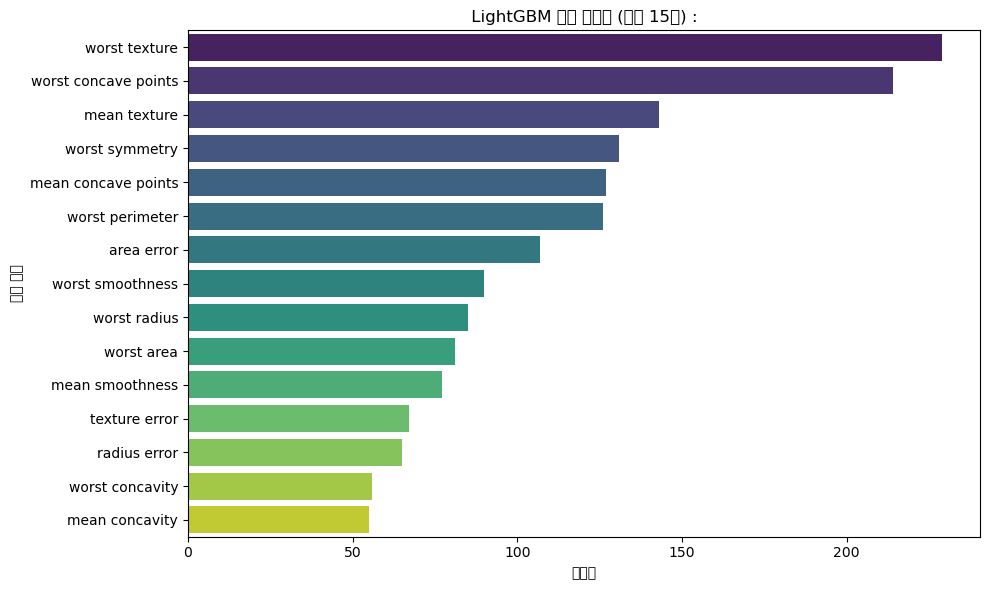

In [13]:
# 라이브러리 임포트
import pandas as pd # 데이터프레임으로 데이터를 다루기 위한 라이브러리
import matplotlib.pyplot as plt # 그래프(특히 시각화)그릴 때 사용
import seaborn as sns # matplotlib 기반의 시각화 라이브러리(좀 더 예쁜시각화)
import lightgbm as lgb # LightGBM 모델 사용을 위한 라이브러리

# LightGBM 모델 선언 및 학습
model = lgb.LGBMClassifier(
    n_estimators=100, # 총 100개의 트리 사용
    learning_rate=0.05, # 학습률(낮을수록 천천히 학습, 성능 안정)
    num_leaves=31,# 하나의 트리에서 가질 수 있는 리프의 최대 개수 (복잡도 조절)
    random_state=42 #랜덤성을 고정해 결과 재현 가능
)
# 모델 학습 단계 : 입력(X_train)에 대해 정답(y_train)을 학습
model.fit(X_train, y_train) #전처리 후 준비된 학습 데이터

# 특성 중요도 추출
importances = model.feature_importances_ #LightGBM이 학습과정에서 각 피처가 얼마나 중요한지 수치화한 값을 가져옴
feature_names = X_train.columns #피처(컬럼)의 이름들

# 중요도 데이터를 데이터프레임으로 정리
feature_df = pd.DataFrame({
    'Feature': feature_names,#Feature: 변수 이름
    'Importance': importances #Importance: 해당 피처의 중요도 점수
}).sort_values(by='Importance', ascending=False)
# 중요도가 높은 순서로 정렬 → 어떤 피처가 예측에 더 영향을 많이 줬는지 확인 가능

# 시각화
plt.figure(figsize=(10, 6)) #그래프 크기 설정
sns.barplot(x='Importance', y='Feature', data=feature_df.head(15), palette='viridis')#색상 테마 설정
plt.title(f'### LightGBM 피처 중요도 (상위 15개) : ') #상위15개 피처만 사용용
plt.xlabel('중요도')
plt.ylabel('피처 이름')
plt.tight_layout()#레이아웃 자동 정리
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 285, number of negative: 170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4544
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626374 -> initscore=0.516691
[LightGBM] [Info] Start training from score 0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

C:\Users\jh\AppData\Local\Temp\ipykernel_12412\1664887535.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df.head(15), palette='viridis')  # 상위 15개


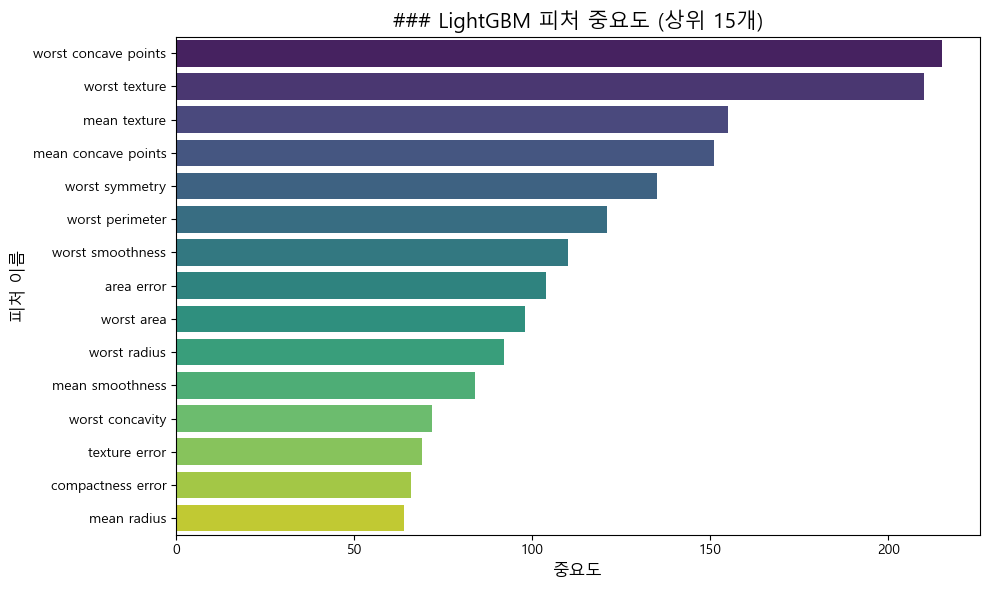

In [19]:
#  라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import matplotlib.font_manager as fm
import platform

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # 윈도우용
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')    # 맥용
else:
    # 리눅스 환경에서는 나눔폰트 등 설치 필요
    import matplotlib
    matplotlib.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 깨짐 방지

#  LightGBM 모델 학습 (여기선 모델이 이미 학습된 상태라고 가정)
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# 특성 중요도 추출
importances = model.feature_importances_
feature_names = X_train.columns

#  중요도 데이터프레임 생성
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

#  시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.barplot(x='Importance', y='Feature', data=feature_df.head(15), palette='viridis')  # 상위 15개
plt.title('### LightGBM 피처 중요도 (상위 15개)', fontsize=15)
plt.xlabel('중요도', fontsize=12)
plt.ylabel('피처 이름', fontsize=12)
plt.tight_layout()
plt.show()


In [14]:
from sklearn.model_selection import cross_val_score #scikit-learn에서 제공하는 교차검증(cross-validation)함수
import lightgbm as lgb #LightGBM(빠르고 효율적인 Gradient Boosting모델)을 불러옴옴

# 교차 검증 (5-Fold, ROC-AUC 기준)
lgb_clf = lgb.LGBMClassifier(random_state=42) #LightGBM 모델 객체 생성

scores = cross_val_score(lgb_clf, X_train, y_train, cv=5, scoring='roc_auc')#평가 지표로 ROC-AUC사용
# 교차검증 수행 (5-Fold CV): 데이터를 5등분 → 그 중 1개는 검증용, 나머지 4개는 학습용으로 사용
# 이 과정을 5번 반복

print(f'교차검증 ROC-AUC 점수 : ', scores) #각 Fold의 ROC-AUC 점수 출력
print(f'평균 ROC-AUC : ', np.mean(scores))
# np.mean(scores)를 통해 평균 ROC-AUC점수 출력 → 전체적인 모델 성능 확인

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 228, number of negative: 136
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3634
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626374 -> initscore=0.516691
[LightGBM] [Info] Start training from score 0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [35]:
# 내부적으로 교차 검증(Cross Validation)을 사용해 모델 평가
from sklearn.model_selection import GridSearchCV
# GridSearchCV:하이퍼파라미터를 체계적으로 모든 조합을 탐색하여 최적값을 찾아주는 도구

# 하이퍼파라미터 후보 정의
params = {
    'num_leaves': [15, 31, 63], #트리의 최대 리프 개수 (클수록 복잡한 모델)
    'learning_rate': [0.1, 0.5, 1], #학습률 (작을수록 천천히 학습하지만 과적합 방지에 유리)
    'n_estimators': [100, 200], # 트리 개수 (클수록 성능 향상 가능, 하지만 과적합 위험 증가)
    'min_data_in_leaf': [10, 20]  #가지치기 관련 문제 완화
}

# GridSearchCV 객체 생성
grid = GridSearchCV(
    estimator=lgb.LGBMClassifier(random_state=42),#estimator: LightGBM분류 모델 객체
    param_grid=params, #실험할 하이퍼파라미터 후보들
    scoring='roc_auc', #평가 기준으로 ROC-AUC 사용(이진 분류 성능을 잘 나타냄)
    cv=3, #3-Fold 교차 검증 (train set을 3등분 → 한 번은 검증, 두 번은 학습)
    n_jobs=-1, #가능한 모든 CPU 코어 사용 (속도 향상)
    verbose=1 # 진행 상황 출력
) # GridSearchCV는 18개의 조합 × 3번 학습 = 총 54회 모델 학습을 수행

# 하이퍼파라미터 튜닝 실행
grid.fit(X_train, y_train)
# 정의한 파라미터 조합으로 학습을 반복하고 최적의 조합(best_params_)을 찾음
# 교차 검증으로 평균 ROC-AUC 점수(best_score_)도 함께 계산


# 결과 출력
print(f' 최적 하이퍼파라미터 : {grid.best_params_}')#ROC-AUC기준으로 가장 좋은 결과를 낸 하이퍼파라미터 조합
print(f' 최고 ROC-AUC 점수 : {grid.best_score_:.4f}')#그 조합에서 얻은 ROC-AUC 평균 점수


Fitting 3 folds for each of 36 candidates, totalling 108 fits
 최적 하이퍼파라미터 : {'learning_rate': 0.1, 'min_data_in_leaf': 10, 'n_estimators': 100, 'num_leaves': 15}
 최고 ROC-AUC 점수 : 0.9905


In [20]:
# 최적 모델로 예측
best_model = grid.best_estimator_ #GridSearchCV객체인 grid는 가장 성능이 좋았던 모델을 .best_estimator_속성에 저장
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# 평가
from sklearn.metrics import classification_report, roc_auc_score

print(f'### 최종 분류 리포트 : \n', classification_report(y_test, y_pred))
print(f'### 최종 ROC-AUC : ', roc_auc_score(y_test, y_proba))


### 최종 분류 리포트 : 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

### 최종 ROC-AUC :  0.9890873015873016
